In [3]:
# pip install praw networkx matplotlib
# Defining the adjaceny matix
import numpy as np
A = np.array([
	[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
	[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
	[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
	[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
	[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [2]:
D = np.diag(A.sum(axis=1))
print(D)

[[4 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


In [4]:
L = D-A
print(L)

[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


In [5]:
# find eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(A)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X = pd.read_csv('medical-history.csv')

X

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [76]:
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)
 
X.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_11300\2829996128.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,MDD,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,SSRI


In [78]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Exclude non-numeric columns or columns that should not be part of the transformation
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

# Handling missing values
X_numeric = X_numeric.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_normalized = normalize(X_scaled)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

X_principal.head()

,P1,P2
0,0.266549,0.911378
1,-0.419846,0.444019
2,0.423213,0.655526
3,-0.063300,0.266217
4,-0.520835,-0.168269


In [79]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

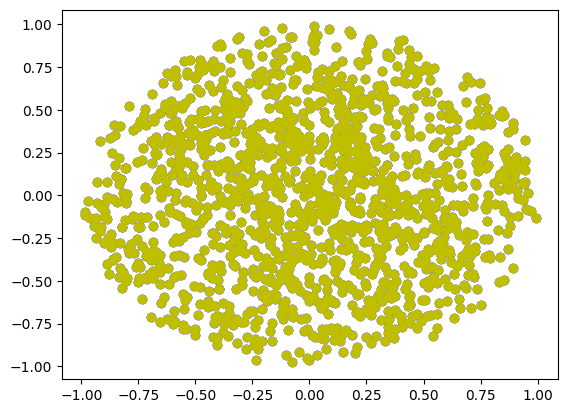

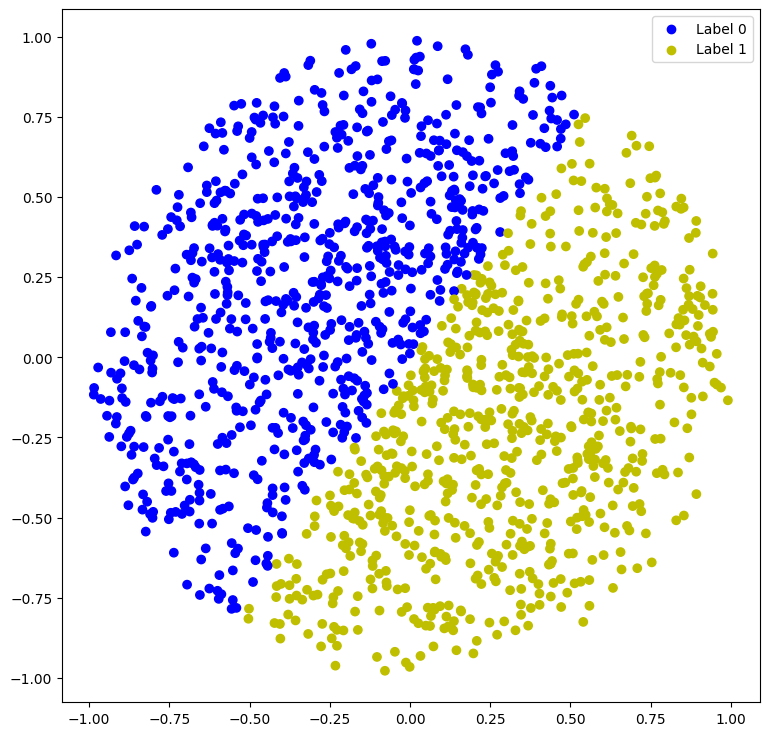

In [80]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
 
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
 
# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
 
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [81]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
 
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [82]:
print("Features of the dataset:")
for feature in X.columns:
    print(feature)

Features of the dataset:
Patient ID
Age
Gender
Ethnicity
Marital Status
Education Level
OCD Diagnosis Date
Duration of Symptoms (months)
Previous Diagnoses
Family History of OCD
Obsession Type
Compulsion Type
Y-BOCS Score (Obsessions)
Y-BOCS Score (Compulsions)
Depression Diagnosis
Anxiety Diagnosis
Medications


### Conclusion:

From the results, it is difficult to derive conclusions because PCA is a dimensionality reduction technique, and the principal components may not have direct interpretability in terms of the original features. The features of the dataset are lacking in being able to grasp interpretation of the scores

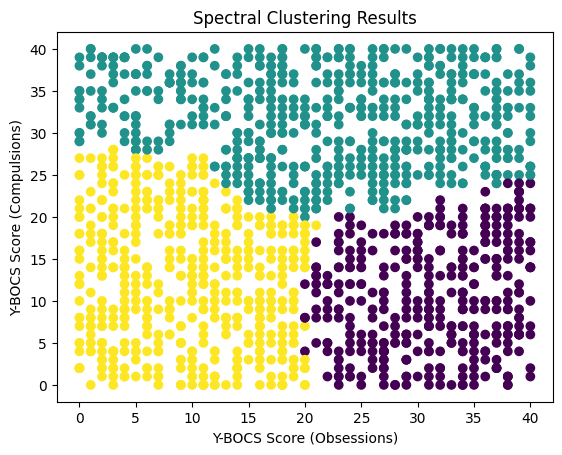

In [100]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "medical-history.csv"
data = pd.read_csv(dataset_path)

# Using the numeric columns 'Industry_code_NZSIOC' and 'Value'
X = data[['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform spectral clustering
n_clusters = 3  # Set the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X_scaled)

# Visualize the results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Spectral Clustering Results')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

### Conclusion

There is no clear separation between the clusters generated by spectral clustering, so different clustering approaches should be implemented instead.

Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

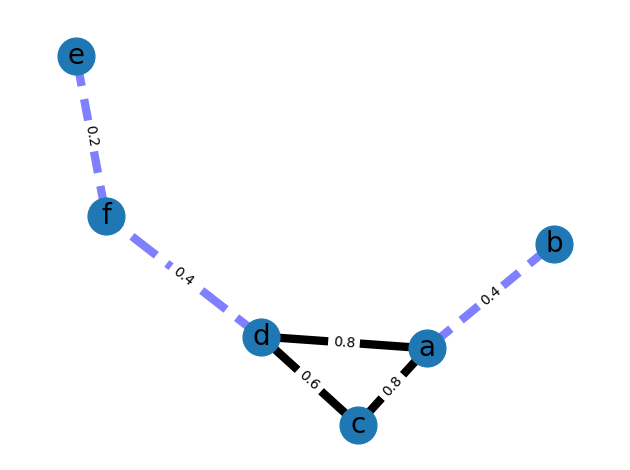

In [94]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.4)
G.add_edge("a", "c", weight=0.8)
G.add_edge("c", "d", weight=0.6)
G.add_edge("f", "e", weight=0.2)
G.add_edge("d", "f", weight=0.4)
G.add_edge("a", "d", weight=0.8)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [95]:
import networkx as nx

G = nx.Graph()
G.add_edge("a", "b", weight=0.4)
G.add_edge("a", "c", weight=0.8)
G.add_edge("c", "d", weight=0.6)
G.add_edge("f", "e", weight=0.2)
G.add_edge("d", "f", weight=0.4)
G.add_edge("a", "d", weight=0.8)

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Print eigenvector centrality for each node
for node, value in centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {value:.4f}")


Node a: Eigenvector Centrality = 0.5454
Node b: Eigenvector Centrality = 0.2337
Node c: Eigenvector Centrality = 0.4753
Node d: Eigenvector Centrality = 0.5641
Node f: Eigenvector Centrality = 0.2960
Node e: Eigenvector Centrality = 0.1268


Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.ypothesis.

godot
Godot: The open source game engine
Top Nodes by Eigenvector Centrality: [Redditor(name='Warm_Charge_5964'), Redditor(name='ABotelho23'), Redditor(name='plastic_machinist'), Redditor(name='creusat0r'), Redditor(name='rchive')]


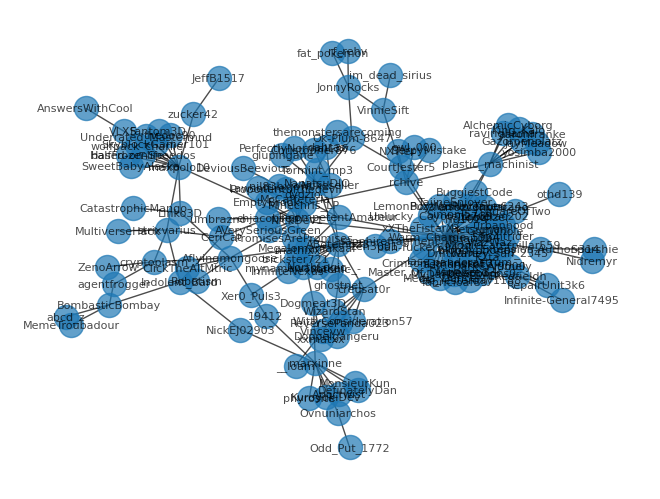

In [59]:
import praw
import networkx as nx
import matplotlib.pyplot as plt  
# Connect to Reddit API
reddit = praw.Reddit(
    client_id="JSuRGp3X0fOzmGIhlZP89w",
    client_secret="2dXt2Er8KfXbnOlvPktLzZiMJTGhVw",
    user_agent="discrete by Pleasant-Pause7071",
)

# Choose a subreddit
subreddit_name = "godot"
subreddit = reddit.subreddit(subreddit_name)
print(subreddit.display_name)  # Prints the subreddit's display name
print(subreddit.title)  # Prints the subreddit's title

# Get the top post from the subreddit
top_post = subreddit.top(limit=1).__next__()

# Use the post ID for social network analysis
post_id = top_post.id

# Function to create a social network graph from comments
def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Check if the comment is a MoreComments object
        if isinstance(comment, praw.models.MoreComments):
            continue  # Skip MoreComments objects
        # Check if the comment has a valid author
        if comment.author:
            parent_comment = comment.parent()
            # Check if the parent comment is a MoreComments object
            if isinstance(parent_comment, praw.models.MoreComments):
                continue  # Skip MoreComments objects
            # Check if the parent comment has a valid author
            if parent_comment and parent_comment.author:
                G.add_edge(comment.author, parent_comment.author)

    return G



# Perform social network analysis
social_network = create_social_network(post_id)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(social_network)

# Sort nodes by eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Print the top nodes
top_nodes = sorted_nodes[:5]
print("Top Nodes by Eigenvector Centrality:", top_nodes)

pos = nx.spring_layout(social_network)  # Set layout algorithm
nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
plt.show()

### Hypothesis:
Individuals who actively participate in discussions within the Godot subreddit community on Reddit are likely to demonstrate increased eigenvector centrality. This heightened centrality signifies a more pivotal and influential position within the community, indicating strong connections with other influential users and contributing to the overall vitality and interconnectedness of the community.

### Conclusion: 
Following a social network analysis of the Godot subreddit community, the findings reveal that specific users display elevated eigenvector centrality, highlighting their central significance within the community. The prominent nodes identified through eigenvector centrality are probably individuals who interact with a diverse range of other engaged users. This implies that these individuals play a pivotal role in linking various members of the community, fostering a more united and lively environment.

In [60]:
print(top_nodes)

[Redditor(name='Warm_Charge_5964'), Redditor(name='ABotelho23'), Redditor(name='plastic_machinist'), Redditor(name='creusat0r'), Redditor(name='rchive')]
